### Top renting listings at redfin.com

In [33]:
#Importing lirbraries
from bs4 import BeautifulSoup
import requests
import re 
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import os
#FOR SQL TABLE CREATION
import mysql.connector
import warnings
import codecs

###### User can enter the zipcode of choice based on their preference
We ask the user to enter the zipcode and then store the zipcode in a zipcode variable. This is later used to find the rental listings for the zipcode and for pagination purposes

In [1]:
zipcode=input("Please enter your zipcode ->")
print("The entered zipcode is", zipcode) 

Please enter your zipcode ->94122
The entered zipcode is 94122


##### Using selenium, entering the zipcode to search redfin website and save the HTML page for further data and insights

In [35]:
url='https://www.redfin.com'
#Creating a new browser window
driver= webdriver.Chrome() 
time.sleep(3)
#Putting the browser to sleep before making a GET Request
driver.get(url)
time.sleep(5)
#We need to click on the reject cookies button after opening the browser
close1=driver.find_element(By.ID, "onetrust-close-btn-container") 
close1.click()

time.sleep(3)
try:
    #Now, we select the option for "Rent" as Redfin also has options for buying property
    driver.find_element(By.XPATH, '//a[text()="Rent"]').click()
    time.sleep(5)
    #Then, we paste the zipcode in the search box and press enter
    driver.find_element(By.ID,"search-box-input").send_keys(zipcode+'\n')
    time.sleep(5)

    #Saving the html page after searching for the zipcode for rental listings
    html_content = driver.page_source
    file_path = zipcode+".html"
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(html_content)

    time.sleep(5)
    #Closing the browser
    driver.quit()
except:
    print("error")

##### Opening the html file that has been saved in the system

<html lang="en">
 <head>
  <script async="true" crossorigin="anonymous" src="https://tr.snapchat.com/config/com/7c5ad0ee-c59d-43d3-b2ba-da6099ef5c95.js?v=3.12.0-2402271815">
  </script>
  <script async="true" crossorigin="anonymous" src="https://tr.snapchat.com/config/com/5777041f-bc82-4340-ae0d-11fb62305886.js?v=3.12.0-2402271815">
  </script>
  <script async="true" crossorigin="anonymous" src="https://tr.snapchat.com/config/com/031086e7-e918-473b-90d3-b1edc85bb900.js?v=3.12.0-2402271815">
  </script>
  <script src="https://ct.pinterest.com/static/ct/token_create.js">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=4&amp;pid=m51mh00&amp;t=ajs&amp;uid=user_475f631e-d2cc-40f0-9637-0ef710d3c356_1710735226077" type="text/javascript">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=3&amp;gdpr=0&amp;pid=cb2cb90&amp;t=ajs&amp;sid=974&amp;uid=c9967ed5-89b8-4030-97c7-f3f429995994" type="text/javascript">
  </script>
  <script async=""
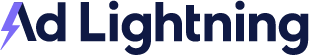

In [36]:
#Reading the html file that was saved
with open(zipcode+".html", "r") as file:
    html_content = file.read()

#Parsing the file and displaying all the content
soup = BeautifulSoup(html_content, "html.parser")
print(soup.prettify())

###### Finding the number of IDs or listings

In [37]:
listing_info = soup.select('[id^="MapHomeCard_"]')
len(listing_info)
#Finding the number of IDs or the number of listings in the page

40

###### Finding the URL of each of these listings or the IDs

In [38]:
listing_url=[]
#Finding each card that contains the listing information using regex and then appending the listing url
for i in range(len(listing_info)):
    listing_id = soup.find_all(id='MapHomeCard_'+str(i))
    for p in listing_id:
        print(p.find_all("a"))
        link=re.findall(r'href="(.*)".*role',str(p.find_all("a")))
        print(type(link))
        print(link[0])
        listing_url.append(url+link[0])
        print(listing_url)
    print("\n\n")
    

[<a class="link-and-anchor visuallyHidden" href="/CA/San-Francisco/Avalon-Sunset-Towers/apartment/177358243" role="button" tabindex="-1" target="_blank" title="Avalon Sunset Towers - 8 Locksley Ave, San Francisco, CA, 94122">Avalon Sunset Towers - 8 Locksley Ave, San Francisco, CA, 94122</a>]
<class 'list'>
/CA/San-Francisco/Avalon-Sunset-Towers/apartment/177358243
['https://www.redfin.com/CA/San-Francisco/Avalon-Sunset-Towers/apartment/177358243']



[<a class="link-and-anchor visuallyHidden" href="/CA/San-Francisco/1400-16th-Ave-94122/home/632456" role="button" tabindex="-1" target="_blank" title="1400 16th Ave, San Francisco, CA, 94122">1400 16th Ave, San Francisco, CA, 94122</a>]
<class 'list'>
/CA/San-Francisco/1400-16th-Ave-94122/home/632456
['https://www.redfin.com/CA/San-Francisco/Avalon-Sunset-Towers/apartment/177358243', 'https://www.redfin.com/CA/San-Francisco/1400-16th-Ave-94122/home/632456']



[<a class="link-and-anchor visuallyHidden" href="/CA/San-Francisco/1500-12th-Av

######  Printing the listing URLs

In [39]:
listing_url
#All the listing URLs

['https://www.redfin.com/CA/San-Francisco/Avalon-Sunset-Towers/apartment/177358243',
 'https://www.redfin.com/CA/San-Francisco/1400-16th-Ave-94122/home/632456',
 'https://www.redfin.com/CA/San-Francisco/1500-12th-Ave-94122/apartment/634967',
 'https://www.redfin.com/CA/San-Francisco/1710-19th-Ave-94122/unit-3/apartment/190196439',
 'https://www.redfin.com/CA/San-Francisco/1643-42nd-Ave-94122/home/637422',
 'https://www.redfin.com/CA/San-Francisco/1395-47th-Ave-94122/apartment/981580',
 'https://www.redfin.com/CA/San-Francisco/1582-42nd-Ave-94122/home/1111074',
 'https://www.redfin.com/CA/San-Francisco/1877-8th-Ave-94122/apartment/177388734',
 'https://www.redfin.com/CA/San-Francisco/750-Parnassus-Ave-94122/apartment/1137607',
 'https://www.redfin.com/CA/San-Francisco/1044-Judah-St-94122/apartment/1173585',
 'https://www.redfin.com/CA/San-Francisco/408-Hugo-St-94122/apartment/1190201',
 'https://www.redfin.com/CA/San-Francisco/1224-45th-Ave-94122/unit-3/apartment/189745158',
 'https://w

######  Finding the listing rent

In [40]:
#Finding the rent of each listing by finding the span class
price = soup.find_all('span', class_='bp-Homecard__Price--value')
listing_rent=[]
for i in range(len(listing_info)):
        rent = re.findall( r'<span>(.*?)<!-- -->.*', str(price[i]))
        listing_rent.append(rent[0])


print(listing_rent)

['$3,117+', '$2,850', '$2,895', '$2,995', '$3,560', '$2,200', '$1,360', '$3,700', '$4,100', '$2,500', '$3,400', '$3,000', '$5,700', '$4,400', '$3,900', '$2,695', '$1,900', '$3,299', '$2,475', '$2,200', '$4,300', '$1,950', '$2,300', '$1,190', '$2,745', '$2,900', '$1,105', '$4,500', '$1,100', '$4,500', '$960', '$1,650', '$3,700', '$3,495', '$2,750', '$2,995', '$3,995', '$1,988', '$2,800', '$4,200']


#####  Finding the content for all the home listing for details such as square feet, number of beds and baths

In [41]:
divs = soup.find_all('div', class_='bp-Homecard__Content')
#All the other details are stored in class hoomecard content

for div in divs:
    print("#--------------------------------------------------#")
    print(div.prettify())


#--------------------------------------------------#
<div class="bp-Homecard__Content">
 <div class="flex align-center justify-between flex-wrap">
  <div class="bp-Homecard__Price flex flex-grow flex-wrap align-baseline color-text-primary font-headline-xsmall">
   <span class="bp-Homecard__Price--value">
    <span>
     $3,117+
     <!-- -->
     /mo
    </span>
   </span>
  </div>
  <div class="flex">
   <div aria-label="Share home" class="bp-ShareExtension" role="button" tabindex="0">
    <svg class="bp-SvgIcon share bp-SvgIcon__size--medium">
     <svg viewbox="0 0 25 24">
      <path clip-rule="evenodd" d="M12.806 13.8c.319 0 .52.008.563.01l.817.038v2.785l5.432-4.736-5.432-4.738v2.862l-.887-.037c-.037 0-4.12-.14-6.841 2.796-.786.847-1.388 1.876-1.805 3.074 2.62-1.872 6.668-2.055 8.153-2.055zm-.326 1.917c-1.724.033-5.73.337-7.595 2.345a3.338 3.338 0 00-.89 1.855c-.05.34-.318.583-.624.583h-.466c-.36 0-.657-.335-.643-.738.123-3.53 1.139-6.344 3.026-8.373 2.44-2.625 5.654-3.182 7.192-3

#####  Square feet of each rental

In [42]:
#Square feet information is stored in sqft 
squarefeet=soup.find_all('span',class_='bp-Homecard__Stats--sqft')
sqft=[]
for i in squarefeet:
    sqft.append(i.get_text())
sqft

['332-767 sq ft',
 '650 sq ft',
 '— sq ft',
 '— sq ft',
 '1,160 sq ft',
 '— sq ft',
 '— sq ft',
 '— sq ft',
 '1,000 sq ft',
 '— sq ft',
 '851 sq ft',
 '450 sq ft',
 '— sq ft',
 '1,200 sq ft',
 '1,024 sq ft',
 '700 sq ft',
 '350 sq ft',
 '950 sq ft',
 '875 sq ft',
 '650 sq ft',
 '1,232 sq ft',
 '352 sq ft',
 '430 sq ft',
 '2,000 sq ft',
 '— sq ft',
 '— sq ft',
 '— sq ft',
 '1,800 sq ft',
 '— sq ft',
 '1,390 sq ft',
 '— sq ft',
 '— sq ft',
 '1,600 sq ft',
 '1,200 sq ft',
 '566 sq ft',
 '— sq ft',
 '— sq ft',
 '750 sq ft',
 '— sq ft',
 '1,026 sq ft']

##### Other details such as pets welcome or not, laundry available or not

In [43]:
#Other details are stored in the <div> tag
other_details=soup.find_all('div',class_='RentalKeyFactsExtension')
details=[]
for i in other_details:
    details.append(i.get_text())
details

['18 units available • Pets welcome • Laundry facility',
 "Walker's paradise • Good transit",
 "Walker's paradise • Good transit",
 'Pets welcome',
 'Very walkable • Good transit',
 'Very walkable • Good transit',
 'Laundry in unit • Dishwasher • Very walkable',
 'Dishwasher • Somewhat walkable • Good transit',
 "Pets welcome • Laundry in unit • Walker's paradise",
 "Pets welcome • Walker's paradise • Good transit",
 "Walker's paradise • Good transit",
 'Pets welcome • Laundry in unit',
 'Laundry in unit • Very walkable • Good transit',
 'Laundry in unit • Dishwasher • Very walkable',
 'Laundry in unit • Dishwasher • Very walkable',
 'Cats welcome',
 'Laundry in unit • Very walkable • Good transit',
 "Walker's paradise • Good transit",
 "Walker's paradise • Good transit",
 'Laundry in unit • Very walkable • Patio/Balcony',
 'Laundry in unit • Very walkable • Good transit',
 "Walker's paradise • Good transit",
 "Walker's paradise • Good transit",
 'Very walkable • Good transit',
 'Dishw

#####  Address of listing

In [44]:
#Address is stored in the Homecard_address class of <div>
home_addr=soup.find_all('div',class_='bp-Homecard__Address')
address=[]
for i in home_addr:
    address.append(i.get_text())
address

['Avalon Sunset Towers\xa0|\xa08 Locksley Ave, San Francisco, CA 94122',
 '1400 16th Ave, San Francisco, CA 94122',
 '1500 12th Ave, San Francisco, CA 94122',
 '1710 19th Ave Unit 3, San Francisco, CA 94122',
 '1643 42nd Ave, San Francisco, CA 94122',
 '1395 47th Ave, San Francisco, CA 94122',
 '1582 42nd Ave, San Francisco, CA 94122',
 '1877 8th Ave, San Francisco, CA 94122',
 '750 Parnassus Ave, San Francisco, CA 94122',
 '1044 Judah St, San Francisco, CA 94122',
 '408 Hugo St, San Francisco, CA 94122',
 '1224 45th Ave Unit 3, San Francisco, CA 94122',
 '1839 27th Ave, San Francisco, CA 94122',
 '1546 42nd Ave, San Francisco, CA 94122',
 '1580 Great Hwy #1, San Francisco, CA 94122',
 '1301 La Playa St Unit 1065r, San Francisco, CA 94122',
 '1501 29th Ave, San Francisco, CA 94122',
 '1242 20th Ave, San Francisco, CA 94122',
 '1325 Lincoln Way, San Francisco, CA 94122',
 '1815 26th Ave, San Francisco, CA 94122',
 '1230 31st Ave, San Francisco, CA 94122',
 '1211 14th Ave, San Francisco,

##### Number of baths and beds in the property

In [45]:
#Baths and beds are preceeded with digits so we use the Regex accordingly
bed=[]
bath=[]

for i in range(len(divs)):
    bedroom_number = re.findall(r'(\d+.?.?.?beds?)',str(divs[i]))
    bath_number=re.findall(r'(\d+.?.?.?baths?)',str(divs[i]))
    sqft_area=re.findall(r'',str(divs[i]))
    #Appending to the dataframe
    bed.append(bedroom_number[0])
    bath.append(bath_number[0])

In [46]:
#Pagination for page-2 of the same zipcdoe
url_page2='https://www.redfin.com/zipcode/'+zipcode+'/apartments-for-rent/page-2'

try:
    #Creating a new browser window
    driver= webdriver.Chrome() 
    time.sleep(3)
    driver.get(url_page2)
    time.sleep(5)
    #Closing the reject cookie button
    close1=driver.find_element(By.ID, "onetrust-close-btn-container") 
    close1.click()

    time.sleep(5)

    html_content = driver.page_source
    file_path = zipcode+"page2.html"
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(html_content)

    time.sleep(5)

    driver.quit()
except:
    print("error")


<html lang="en">
 <head>
  <script src="https://ct.pinterest.com/static/ct/token_create.js">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=4&amp;pid=m51mh00&amp;t=ajs&amp;uid=user_07902fb3-fc7a-43b6-a6ad-723384996404_1710735572959" type="text/javascript">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=3&amp;gdpr=0&amp;pid=cb2cb90&amp;t=ajs&amp;sid=974&amp;uid=8a8a7678-cb65-49e8-a7f7-481439d01f30" type="text/javascript">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=3&amp;pid=m51mh00&amp;t=ajs&amp;uid=user_07902fb3-fc7a-43b6-a6ad-723384996404_1710735572959" type="text/javascript">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=2&amp;gdpr=0&amp;pid=cb2cb90&amp;t=ajs&amp;sid=974&amp;uid=8a8a7678-cb65-49e8-a7f7-481439d01f30" type="text/javascript">
  </script>
  <script async="" defer="" src="https://ps.eyeota.net/pixel?e_rc=2&amp;pid=m51mh00&amp;t=ajs&amp;uid=user_
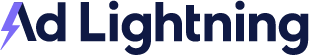

In [47]:
with open(zipcode+"page2.html", "r") as file:
    html_content2 = file.read()

#Parsing the file and displaying all the content
soup2 = BeautifulSoup(html_content2, "html.parser")
print(soup2.prettify())

In [48]:
listing_info2 = soup2.select('[id^="MapHomeCard_"]')
len(listing_info2)
#Finding the number of IDs or the number of listings in the page

6

In [49]:
listing_info2

[<div class="HomeCardContainer flex justify-center selectedHomeCard isRentals" data-rf-test-id="react-data-photo-row-40" id="MapHomeCard_40"><div class="MapHomeCardReact MapHomeCard" data-rf-paint-id="map" data-rf-test-name="mapHomeCard"><div aria-label="Property at 51 Judah St, San Francisco, CA, 94122, 3 beds, 2 baths, [object Object]" class="bp-Homecard bp-InteractiveHomecard MapHomecardWrapper MapHomecardWrapper--rentals MapHomecardWrapper--selected bp-InteractiveHomecard--hideNumIndicator clickable" data-rf-test-name="basicNode-homeCard" role="button" tabindex="0" title="51 Judah St, San Francisco, CA, 94122"><a class="link-and-anchor visuallyHidden" href="/CA/San-Francisco/51-Judah-St-94122/apartment/189586767" role="button" tabindex="-1" target="_blank" title="51 Judah St, San Francisco, CA, 94122">51 Judah St, San Francisco, CA, 94122</a><div class="bp-Homecard__PhotoWrapper" style="padding-top:66.67%"><div aria-label="carousel" class="bp-Carousel desktop bp-InteractiveHomecard

In [50]:
len(listing_info2)

6

In [51]:
#Homecard is the id storing listing URL
listing_url2=[]
i=len(listing_info)
while(i<len(listing_info)+len(listing_info2)):
    listing_id2 = soup2.find_all(id='MapHomeCard_'+str(i))
    for p in listing_id2:
        print(p.find_all("a"))
        link2=re.findall(r'href="(.*)".*role',str(p.find_all("a")))
        print(type(link2))
        print(link2[0])
        listing_url2.append(url_page2+link2[0])
        print(listing_url2)
        i+=1
    print("\n\n")

[<a class="link-and-anchor visuallyHidden" href="/CA/San-Francisco/51-Judah-St-94122/apartment/189586767" role="button" tabindex="-1" target="_blank" title="51 Judah St, San Francisco, CA, 94122">51 Judah St, San Francisco, CA, 94122</a>]
<class 'list'>
/CA/San-Francisco/51-Judah-St-94122/apartment/189586767
['https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/51-Judah-St-94122/apartment/189586767']



[<a class="link-and-anchor visuallyHidden" href="/CA/San-Francisco/1044-Judah-St-94122/unit-6/home/189789994" role="button" tabindex="-1" target="_blank" title="1044 Judah St Unit 6, San Francisco, CA, 94122">1044 Judah St Unit 6, San Francisco, CA, 94122</a>]
<class 'list'>
/CA/San-Francisco/1044-Judah-St-94122/unit-6/home/189789994
['https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/51-Judah-St-94122/apartment/189586767', 'https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/1044-Judah-St-94122/uni

In [52]:
listing_url2

['https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/51-Judah-St-94122/apartment/189586767',
 'https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/1044-Judah-St-94122/unit-6/home/189789994',
 'https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/1141-Irving-St-94122/unit-1/home/189977817',
 'https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/1044-Judah-St-94122/unit-10/apartment/190089874',
 'https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/1342-11th-Ave-94122/unit-B/home/190064347',
 'https://www.redfin.com/zipcode/94122/apartments-for-rent/page-2/CA/San-Francisco/1381-20th-Ave-94122/apartment/628547']

In [53]:
#Storing the rent for page 2 of the zipcode
price2 = soup2.find_all('span', class_='bp-Homecard__Price--value')
listing_rent2=[]
for i in range(len(listing_info2)):
        rent2 = re.findall( r'<span>(.*?)<!-- -->.*', str(price[i]))
        listing_rent2.append(rent2[0])


print(listing_rent2)

['$3,117+', '$2,850', '$2,895', '$2,995', '$3,560', '$2,200']


In [54]:
##Printing the homecard information

divs2 = soup2.find_all('div', class_='bp-Homecard__Content')


for div in divs2:
    print("#--------------------------------------------------#")
    print(div.prettify())

#--------------------------------------------------#
<div class="bp-Homecard__Content">
 <div class="flex align-center justify-between flex-wrap">
  <div class="bp-Homecard__Price flex flex-grow flex-wrap align-baseline color-text-primary font-headline-xsmall">
   <span class="bp-Homecard__Price--value">
    <span>
     $4,095
     <!-- -->
     /mo
    </span>
   </span>
  </div>
  <div class="flex">
   <div aria-label="Share home" class="bp-ShareExtension" role="button" tabindex="0">
    <svg class="bp-SvgIcon share bp-SvgIcon__size--medium">
     <svg viewbox="0 0 25 24">
      <path clip-rule="evenodd" d="M12.806 13.8c.319 0 .52.008.563.01l.817.038v2.785l5.432-4.736-5.432-4.738v2.862l-.887-.037c-.037 0-4.12-.14-6.841 2.796-.786.847-1.388 1.876-1.805 3.074 2.62-1.872 6.668-2.055 8.153-2.055zm-.326 1.917c-1.724.033-5.73.337-7.595 2.345a3.338 3.338 0 00-.89 1.855c-.05.34-.318.583-.624.583h-.466c-.36 0-.657-.335-.643-.738.123-3.53 1.139-6.344 3.026-8.373 2.44-2.625 5.654-3.182 7.192-3.

In [55]:
##Store the rental information of other details
det2=soup2.find_all('div',class_='RentalKeyFactsExtension')
details2=[]
for i in det2:
    details2.append(i.get_text())
details2

['Laundry in unit',
 'Pets welcome • Laundry in unit • Dishwasher',
 'Pets welcome • Parking',
 'Pets welcome',
 'Parking',
 "Walker's paradise • Good transit"]

In [56]:
##Address informmation
addr2=soup2.find_all('div',class_='bp-Homecard__Address')
address2=[]
for i in addr2:
    address2.append(i.get_text())
address2

['51 Judah St, San Francisco, CA 94122',
 '1044 Judah St Unit 6, San Francisco, CA 94122',
 '1141 Irving St Unit 1, San Francisco, CA 94122',
 '1044 Judah St Unit 10, San Francisco, CA 94122',
 '1342 11th Ave Unit B, San Francisco, CA 94122',
 '1381 20th Ave, San Francisco, CA 94122']

In [57]:
#Size of the house
squarefeet2=soup2.find_all('span',class_='bp-Homecard__Stats--sqft')
sqft2=[]
for i in squarefeet2:
    sqft2.append(i.get_text())
sqft2

['— sq ft', '— sq ft', '950 sq ft', '— sq ft', '1,500 sq ft', '600 sq ft']

In [58]:
##Finding the bed and bathroom for page-2
bed_2=[]
bath_2=[]
for i in range(len(divs2)):
    bed2 = re.findall(r'(\d+.?.?.?beds?)',str(divs2[i]))
    bed_2.append(bed2[0])
    bath2=re.findall(r'(\d+.?.?.?baths?)',str(divs2[i]))
    bath_2.append(bath2[0])
    

In [59]:
#Combining the dataframes
combined_bedroom=bed+bed_2
combined_bath= bath + bath_2
combined_sqft= sqft+ sqft2
combined_address= address + address2
combined_details = details + details2
combined_listing_rent= listing_rent + listing_rent2
combined_listing_url= listing_url+ listing_url2

In [60]:
#Printing the information
for i in range(len(combined_listing_url)):
    print("\nOption Number",i+1,"Details:")
    print("URL:",combined_listing_url[i])
    print("Number of Bedroom(s):",combined_bedroom[i])
    print("Number of Bathroom(s):",combined_bath[i])
    print("Square foot:",combined_sqft[i])
    print("Address:",combined_address[i])
    print("Rent:",combined_listing_rent[i])
    print("Details:",combined_details[i])
    print("*****")


Option Number 1 Details:
URL: https://www.redfin.com/CA/San-Francisco/Avalon-Sunset-Towers/apartment/177358243
Number of Bedroom(s): 0-1 beds
Number of Bathroom(s): 1 bath
Square foot: 332-767 sq ft
Address: Avalon Sunset Towers | 8 Locksley Ave, San Francisco, CA 94122
Rent: $3,117+
Details: 18 units available • Pets welcome • Laundry facility
*****

Option Number 2 Details:
URL: https://www.redfin.com/CA/San-Francisco/1400-16th-Ave-94122/home/632456
Number of Bedroom(s): 0 beds
Number of Bathroom(s): 1 bath
Square foot: 650 sq ft
Address: 1400 16th Ave, San Francisco, CA 94122
Rent: $2,850
Details: Walker's paradise • Good transit
*****

Option Number 3 Details:
URL: https://www.redfin.com/CA/San-Francisco/1500-12th-Ave-94122/apartment/634967
Number of Bedroom(s): 1 bed
Number of Bathroom(s): 1 bath
Square foot: — sq ft
Address: 1500 12th Ave, San Francisco, CA 94122
Rent: $2,895
Details: Walker's paradise • Good transit
*****

Option Number 4 Details:
URL: https://www.redfin.com/CA

#####  SQL Storage 

In [61]:
#ignore warnings
warnings.filterwarnings("ignore")
SQL_DB = "ucdavis"
#CREATING FUNCTION TO CREATE DATABASE AND SQL TABLE
def create_sql_table(SQL_TABLE_URBAN, SQL_TABLE_URBAN_DEF):
    try:
        #connect to server
        conn = mysql.connector.connect(host='localhost',
                                       user='root',
                                       password='qwerty123')
        cursor = conn.cursor()
        
        query = "CREATE DATABASE IF NOT EXISTS " + SQL_DB
        print(query)
        cursor.execute(query);
        
        query = "CREATE TABLE IF NOT EXISTS " + SQL_DB + "." + SQL_TABLE_URBAN + " " + SQL_TABLE_URBAN_DEF + ";";
        print(query)
        cursor.execute(query);
        cursor.close()
        conn.close()
        return

    except IOError as e:
        print(e)

In [62]:
#OUR TABLE NAME IS rentals
SQL_TABLE_URBAN = "rental_table2"
#DEFINING THE TABLE WITH THE DATA TYPES AND SIZES
SQL_TABLE_URBAN_DEF = "(" + \
        "id INT NOT NULL AUTO_INCREMENT PRIMARY KEY" + \
        ",url VARCHAR(200)" + \
        ",bedroom VARCHAR(50)" + \
        ",bath VARCHAR(50)" + \
        ",sqft VARCHAR(50)" + \
        ",address VARCHAR(100)" + \
        ",details VARCHAR(500)" + \
        ",rent VARCHAR(50)" + \
        ")"
try:
    create_sql_table(SQL_TABLE_URBAN, SQL_TABLE_URBAN_DEF)

except IOError as e:
    print(e)

try:
    # connect to server
    conn = mysql.connector.connect(host='localhost',
                                   database='ucdavis',
                                   user='root',
                                   password='qwerty123')

    cursor = conn.cursor()

 
    # INSERTION CODE
    parameterized_stmt = "INSERT INTO " + SQL_TABLE_URBAN + "(url,bedroom, bath, sqft, address,details,rent) VALUES (%s, %s, %s, %s, %s,%s,%s);"
    #SINCE I STORED MY VALUES IN LISTS, I AM INSERTING EACH ITEM OF THE LIST TO THE TABLE
    for i in range(len(combined_listing_url)):
        #parameterized version
        cursor.execute(parameterized_stmt, (combined_listing_url[i], combined_bedroom[i]
                                            ,combined_bath[i], combined_sqft[i],combined_address[i]
                                            ,combined_details[i]
                                           ,combined_listing_rent[i]))
        print(i," Done") #PRINTING A SUCCESSFUL INSERTION MESSAGE 
        
    conn.commit()
    cursor.close()
    conn.close()
    
except IOError as e:
    print(e)

CREATE DATABASE IF NOT EXISTS ucdavis
CREATE TABLE IF NOT EXISTS ucdavis.rental_table2 (id INT NOT NULL AUTO_INCREMENT PRIMARY KEY,url VARCHAR(200),bedroom VARCHAR(50),bath VARCHAR(50),sqft VARCHAR(50),address VARCHAR(100),details VARCHAR(500),rent VARCHAR(50));
0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
10  Done
11  Done
12  Done
13  Done
14  Done
15  Done
16  Done
17  Done
18  Done
19  Done
20  Done
21  Done
22  Done
23  Done
24  Done
25  Done
26  Done
27  Done
28  Done
29  Done
30  Done
31  Done
32  Done
33  Done
34  Done
35  Done
36  Done
37  Done
38  Done
39  Done
40  Done
41  Done
42  Done
43  Done
44  Done
45  Done


##### Top 5 cheapest places to rent

In [63]:
try:
    # connect to server
    conn = mysql.connector.connect(host='localhost',
                                   database='ucdavis',
                                   user='root',
                                   password='qwerty123')

    cursor = conn.cursor()

 
    # INSERTION CODE
    query = "select * from rental_table2 order by rent asc limit 5";
    print(query)
    cursor.execute(query);
    results = cursor.fetchall()
    for row in results:
        print(row)
    cursor.close()
    conn.close()
    
except IOError as e:
    print(e)

select * from rental_table2 order by rent asc limit 5
(29, 'https://www.redfin.com/CA/San-Francisco/2008-Judah-St-94122/home/148076141', '1 bed', '1 bath', '— sq ft', '2008 Judah St, San Francisco, CA 94122', "Laundry in unit • Walker's paradise • Good transit", '$1,100')
(27, 'https://www.redfin.com/CA/San-Francisco/1235-24th-Ave-94122/home/1969557', '1 bed', '1 bath', '— sq ft', '1235 24th Ave, San Francisco, CA 94122', "Laundry in unit • Dishwasher • Walker's paradise", '$1,105')
(24, 'https://www.redfin.com/CA/San-Francisco/1836-25th-Ave-94122/home/1985065', '1 bed', '1 bath', '2,000 sq ft', '1836 25th Ave, San Francisco, CA 94122', 'Very walkable • Good transit', '$1,190')
(7, 'https://www.redfin.com/CA/San-Francisco/1582-42nd-Ave-94122/home/1111074', '1 bed', '1 bath', '— sq ft', '1582 42nd Ave, San Francisco, CA 94122', 'Laundry in unit • Dishwasher • Very walkable', '$1,360')
(32, 'https://www.redfin.com/CA/San-Francisco/1408-31st-Ave-94122/apartment/183027214', '1 bed', '1 bat